In [1]:
!pip install xgboost

In [1]:
#importing important libraries 
import numpy as np
import pandas as pd
import os, sys
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; font-size: 12px;}</style>"))
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
#Read the data
#PC
df=pd.read_csv('C:/Users/u_je_/GoogleDrive/Personal/Work/Online/Jupyter/Git/Python_ML_Project_Parkinson_Disease_XGBoost/parkinsons.data')
#df=pd.read_csv('C:\\Users\\pc\\Google Drive\\Personal\\Work\\Online\\Jupyter\\Git\\Python_ML_Project_Parkinson_Disease_XGBoost\\parkinsons.data')

In [7]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [8]:
# some information on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [9]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [6]:
# understanding how many unique values i have
for col_name in df.columns:
    print(col_name, len(df[col_name].unique()))

name 195
MDVP:Fo(Hz) 195
MDVP:Fhi(Hz) 195
MDVP:Flo(Hz) 195
MDVP:Jitter(%) 173
MDVP:Jitter(Abs) 19
MDVP:RAP 155
MDVP:PPQ 165
Jitter:DDP 180
MDVP:Shimmer 188
MDVP:Shimmer(dB) 149
Shimmer:APQ3 184
Shimmer:APQ5 189
MDVP:APQ 189
Shimmer:DDA 189
NHR 185
HNR 195
status 2
RPDE 195
DFA 195
spread1 195
spread2 194
D2 195
PPE 195


In [42]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


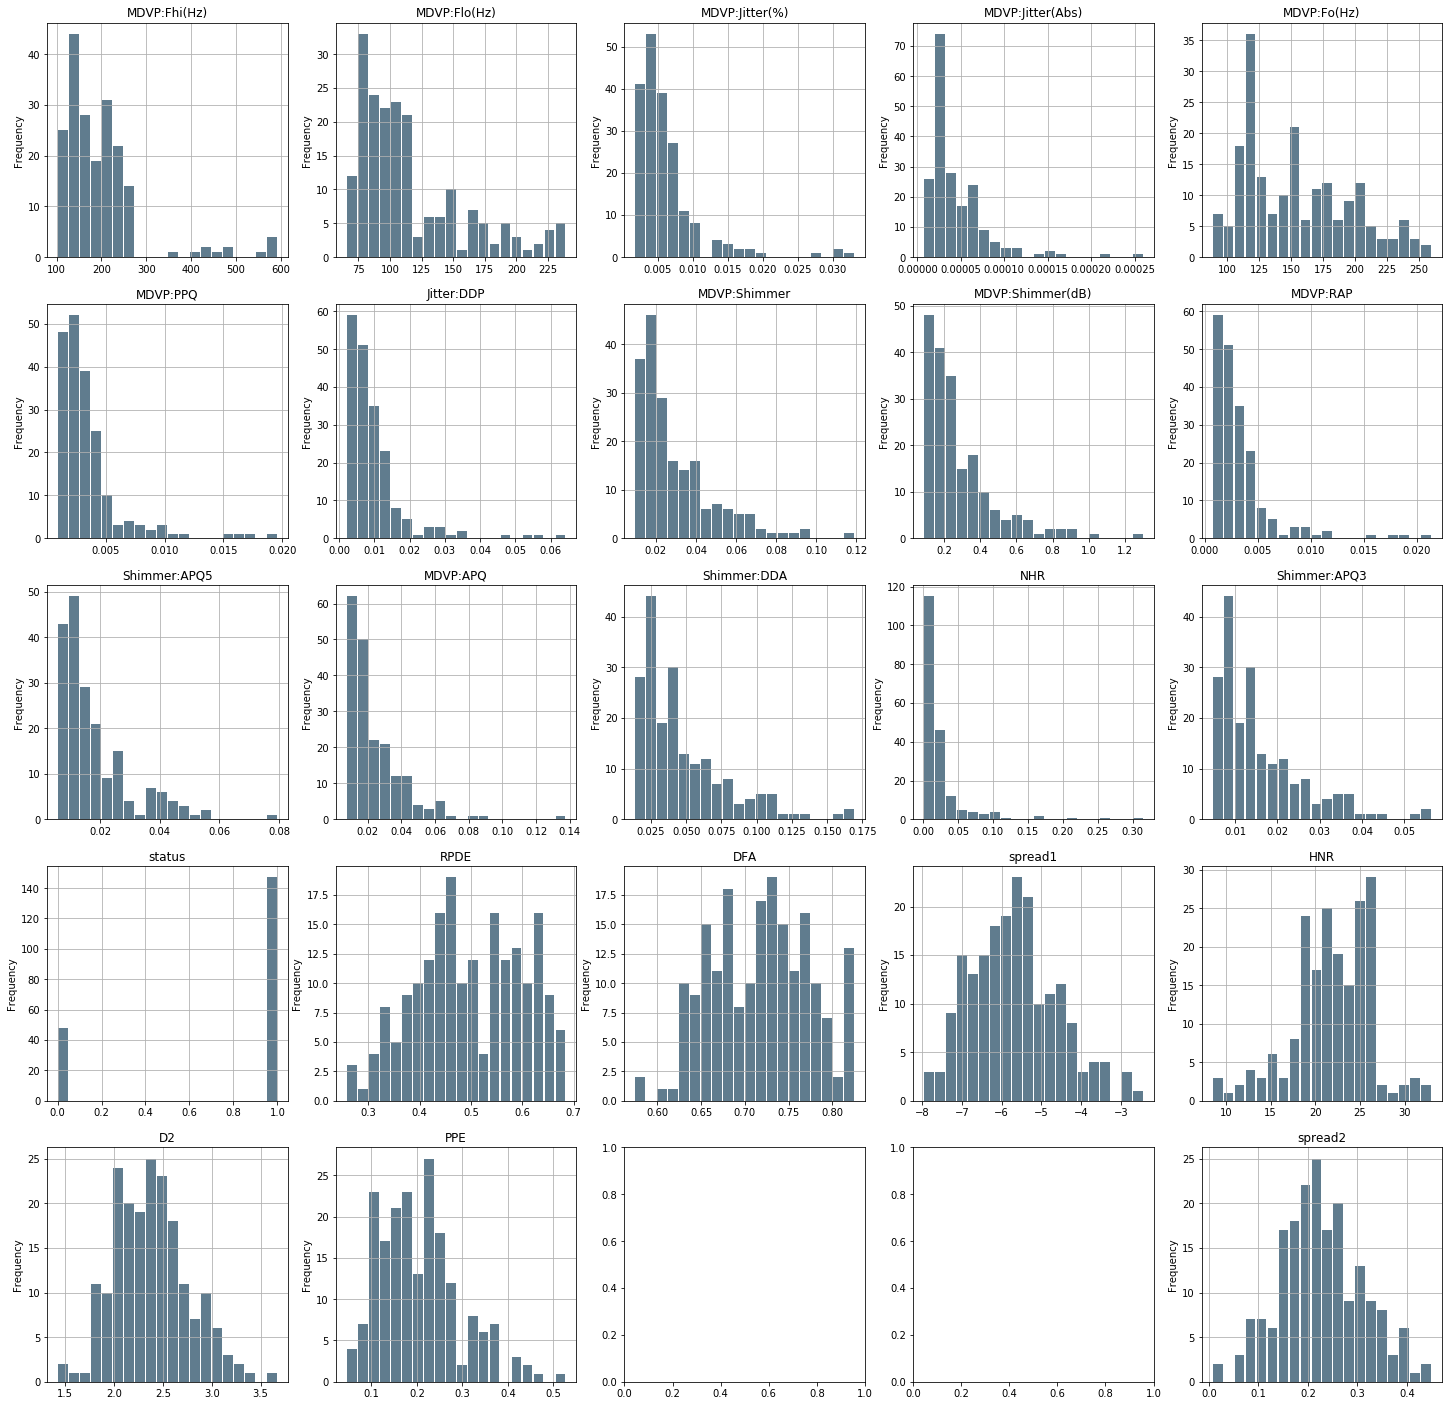

In [65]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=[25, 25])

for column in range(len(df.columns[1:])):
    #print(df.columns[column+1])
    data=df[df.columns[column+1]]

    col=(column%5)-1
    row=(column//5)
    data.plot.hist(grid=True, bins=20, rwidth=0.9,
                       color='#607c8e',ax=axes[row,col],title=df.columns[column+1])


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


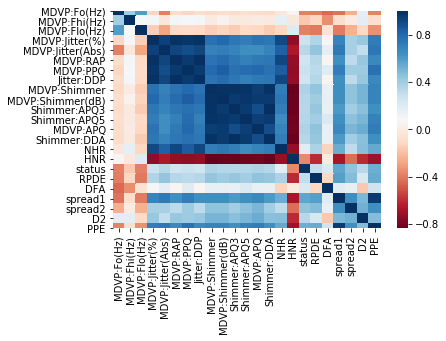

In [46]:
#drop name column
#df=df.drop(0)
# calculate the correlation matrix
corr = df.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')
corrMatrix=corr

In [61]:
dfnoname=df.drop(['name'], axis=1)
dfnoname

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [69]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.65
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]
# Drop features 
reduceddf=df.drop(df[to_drop], axis=1)
reduceddf

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),status,RPDE,DFA,spread2,D2
0,119.992,157.302,74.997,0.00784,1,0.414783,0.815285,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,1,0.458359,0.819521,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,1,0.429895,0.825288,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,1,0.434969,0.819235,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,1,0.417356,0.823484,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0,0.448439,0.657899,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0,0.431674,0.683244,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0,0.407567,0.655683,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0,0.451221,0.643956,0.207454,2.138608


In [35]:
def correlation_reduction(corrMatrix, threshold=0.5): 
    corrmat = abs(corrMatrix.copy(deep=True))

    #Correlation Threshold
    for col in corrMatrix: 
        if col in corrMatrix.keys(): 
            thisCol=[]
            thisVars=[]
            for i in range(len(corrMatrix)): 
                if (abs(corrMatrix[col][i])==1.0) and (col != corrMatrix.keys()[i]): 
                    thisCorr=0
                else: 
                    #tag the highly corelated one as positive and the rest as negative
                    thisCorr = (1 if abs(corrMatrix[col][i])>threshold else -1) * abs(target[corrMatrix.keys()[i]].values[0])
                thisCol.append(thisCorr)
                thisVars.append(corrMatrix.keys()[i])
            mask = np.ones(len(thisCol), dtype=bool)
            ctDelCol = 0 
            for n, j in enumerate(thisCol): 
                mask[n]=not (j!=max(thisCol) and j >=0)
                 # keep the max, remove the rest of highly correlated ones
                if j !=max(thisCol) and j>=0: 
                    corrMatrix.pop('%s' %thisVars[n])
                    target.pop('%s' %thisVars[n])
                    ctDelCol +=1
            corrMatrix=corrMatrix[mask]
    corrmat = abs(corrMatrix.copy(deep=True))
    return corrmat

In [36]:
corrreduced=correlation_reduction(corrMatrix)
corrreduced

NameError: name 'target' is not defined

In [ ]:
 * abs(temp[corrMatrix.keys()[i]])

In [25]:
# for each column in the column in the corr matrix
for col in corrMatrix:
    if col in corrMatrix.keys():
        print(col)
        thisCol= []
        thisVars = []
        temp=[]
        corrTol = 0.65
        #store the corr with the dep var for fields that are highly correlated with each other
        for i in range (len(corrMatrix)):
            if abs(corrMatrix[col][i]) == 1.0 and col != corrMatrix.keys()[1]:
                thisCorr=0
            else:
                #tag the highly corelated one as positive and the rest as negative
                thisCorr = (1 if abs(corrMatrix[col][i])>corrTol else -1) * abs(temp[corrMatrix.keys()[i]])
            thisCol.append(thisCorr)
            thisVars.append(corrMatrix.keys()[i])
            
        mask = np.ones(len(thisCol), dtype=bool) # initialize the mask
        
        ctDelCol=0 # to keep track of the number of columns deleted
        
        for n, j in enumerate(thisCol):
            # delete if  (a) a var is correlated with others and aa not have the best cor with dep,
            # or (b) completely corr with the 'col'
            mask[n] = not (j != max(thisCol) and j>=0)
            
            if j != max(thisCol) and j >= 0:
                #delete the column from the corr matrix
                corrMatrix.pop('%s' %thisVars[n])
                temp.pop('%s' %thisVars[n])
                ctDelCol += 1
        # Delete the corresponding row(s) from the corr matrix
        corrMatrix = corrMatrix[mask]

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
status
RPDE
DFA
spread1
spread2
D2
PPE


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


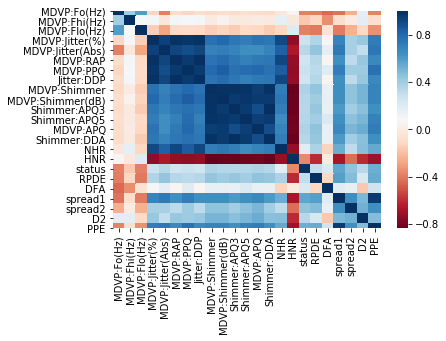

In [69]:

# calculate the correlation matrix
corr = df.corr()
# display the correlation matrix
display(corr)
# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

In [83]:
reduceddf

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),status,RPDE,DFA,spread2,D2
0,119.992,157.302,74.997,0.00784,1,0.414783,0.815285,0.266482,2.301442
1,122.400,148.650,113.819,0.00968,1,0.458359,0.819521,0.335590,2.486855
2,116.682,131.111,111.555,0.01050,1,0.429895,0.825288,0.311173,2.342259
3,116.676,137.871,111.366,0.00997,1,0.434969,0.819235,0.334147,2.405554
4,116.014,141.781,110.655,0.01284,1,0.417356,0.823484,0.234513,2.332180
...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0,0.448439,0.657899,0.121952,2.657476
191,209.516,253.017,89.488,0.00564,0,0.431674,0.683244,0.129303,2.784312
192,174.688,240.005,74.287,0.01360,0,0.407567,0.655683,0.158453,2.679772
193,198.764,396.961,74.904,0.00740,0,0.451221,0.643956,0.207454,2.138608


In [90]:
#Get the features and labels 
df=reduceddf
features=df.loc[:,df.columns!='status'].values[:,:]
labels=df.loc[:,'status'].values
features.shape

(195,)

In [91]:
#count of each label (0 and 1) in labels
#The shape attribute for numpy arrays returns the dimensions of the array.
#If Y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n.
# 1 =
# 0 = 
print(labels[labels==1].shape[0], labels[labels==0].shape[0])

147 48


In [92]:
#how many nulls?
df.isnull().sum()

MDVP:Fo(Hz)       0
MDVP:Fhi(Hz)      0
MDVP:Flo(Hz)      0
MDVP:Jitter(%)    0
status            0
RPDE              0
DFA               0
spread2           0
D2                0
dtype: int64

In [93]:
#Initialize a MinMaxScaler and scale the features to between -1 and 1 to normalize them.
#The MinMaxScaler transforms features by scaling them to a given range.
#The fit_transform() method fits to the data and then transforms it. We don’t need to scale the labels
#DataFlair - Scale the features to between -1 and 1
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(5, 20))
x=min_max_scaler.fit_transform(features)
y=labels

In [94]:
#Split the dataset
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [96]:
#dataframesformate
dfx_train=pd.DataFrame(x_train, columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'RPDE', 'DFA',
       'spread2', 'D2']) 
dfx_test = pd.DataFrame(x_test, columns=['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
        'RPDE', 'DFA',
       'spread2', 'D2']) 
dfy_train = pd.DataFrame(y_train, columns=['Status'])
dfy_test = pd.DataFrame(y_test, columns=['Status'])

In [97]:
#combining trains and tests
Rtrain = pd.concat([dfx_train, dfy_train], axis=1, sort=False)

Rtest = pd.concat([dfx_test, dfy_test], axis=1, sort=False)

In [98]:
#Train the model
model=XGBClassifier()
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [108]:
#Define target and ID columns:
target = 'Purchase'
IDcol = ['User_ID','Product_ID']
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])       
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    #try:
    #coefcients=alg.coef_
    #print(coefcients)
    #except:
        #Return the feature importances (the higher, the more important the feature).
        #print(alg.feature_importances_)
    
    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))    
    #print(accuracy_score(dtrain[target], dtrain_predictions)*100)
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])    
    #Export submission file:
    #IDcol.append(target)
    #submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    #submission.to_csv(
        #r"C:/Users/u_je_/GoogleDrive/Personal/Work/Online/Jupyter/Git/Black friday Analysis Github repository/Black_Friday_data_analysis/black friday/output/test1.csv",index=False)

In [17]:
#Logistic Regression is a classification algorithm which is used when we want to predict a categorical variable (Yes/No, Pass/Fail) based on a set of independent variable(s).

[-0.0066389  -0.01914451 -0.03051344  0.00369416  0.01992857  0.02690332
  0.04535634]

Model Report
RMSE : 0.3519
CV Score : Mean - 0.3557 | Std - 0.09289 | Min - 0.1955 | Max - 0.5291


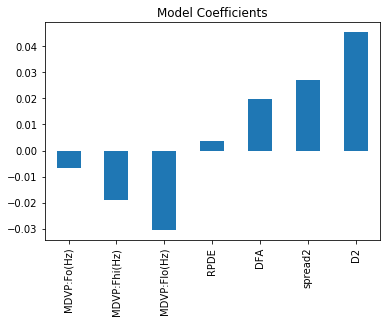

In [101]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","RPDE","DFA","spread2","D2"]
target ="Status"
modelfit(LR, Rtrain, Rtest, predictors, target, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors)
coef1.plot(kind='bar', title='Model Coefficients')

[-0.00157734 -0.0197791  -0.02834955  0.00183221 -0.00973751 -0.01420971
  0.00981635  0.01692955  0.01816465  0.04656127]

Model Report
RMSE : 0.3399
CV Score : Mean - 0.3509 | Std - 0.0937 | Min - 0.1754 | Max - 0.4986


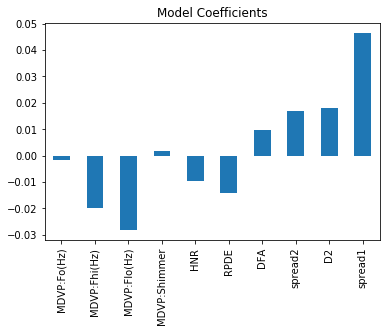

In [60]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Shimmer","HNR","RPDE","DFA","spread2","D2","spread1"]
target ="Status"
modelfit(LR, Rtrain, Rtest, predictors, target, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors)
coef1.plot(kind='bar', title='Model Coefficients')

In [110]:

from sklearn.tree import DecisionTreeRegressor
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","RPDE","DFA","spread2","D2"]
target ="Status"
modelfit(RF, Rtrain, Rtest, predictors, target, 'LR.csv')
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 0.4402
CV Score : Mean - 0.4348 | Std - 0.0859 | Min - 0.277 | Max - 0.6165


ValueError: Length of passed values is 1, index implies 7

In [28]:
from sklearn.tree import DecisionTreeRegressor
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Shimmer","HNR","RPDE","DFA","spread2","D2","spread1"]
target ="Status"
modelfit(RF, Rtrain, Rtest, predictors, target, 'LR.csv')
coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Model Report
RMSE : 0.4402
CV Score : Mean - 0.4348 | Std - 0.0859 | Min - 0.277 | Max - 0.6165


ValueError: Classification metrics can't handle a mix of binary and continuous targets

[[-0.03789866 -0.10609096 -0.13616908  0.10626308  0.1847906   0.21236492
   0.49073368]]

Model Report
RMSE : 0.4003
CV Score : Mean - 0.4145 | Std - 0.1657 | Min - 0 | Max - 0.6547


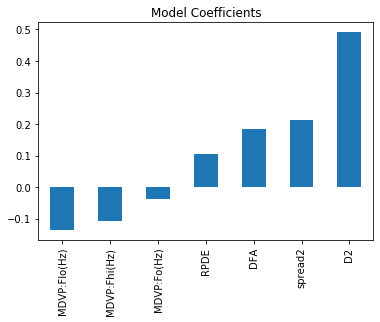

In [103]:
["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","RPDE","DFA","spread2","D2"]
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',max_iter=200)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","RPDE","DFA","spread2","D2"]
target ="Status"
modelfit(LR, Rtrain, Rtest, predictors, target, 'LR.csv')
coef1 = pd.Series(LR.coef_[0], predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

[[ 0.03656056 -0.115535   -0.07319406  0.56534407  0.19185074 -0.1023436
   0.05249143  0.11888348  0.23902891  0.72809515]]

Model Report
RMSE : 0.3755
CV Score : Mean - 0.3508 | Std - 0.2225 | Min - 0 | Max - 0.6547


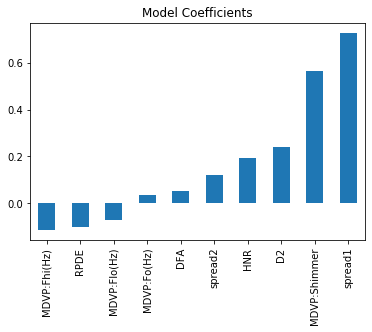

In [20]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr',max_iter=200)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Shimmer","HNR","RPDE","DFA","spread2","D2","spread1"]
target ="Status"
modelfit(LR, Rtrain, Rtest, predictors, target, 'LR.csv')
coef1 = pd.Series(LR.coef_[0], predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 0.3581
CV Score : Mean - 0.3439 | Std - 0.1908 | Min - 0 | Max - 0.6124


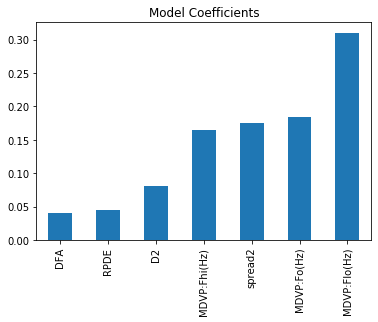

In [111]:

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
predictors =["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","RPDE","DFA","spread2","D2"]
target ="Status"
modelfit(RF, Rtrain, Rtest, predictors, target, 'LR.csv')
coef1 = pd.Series(RF.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

[0.07955969 0.07030829 0.15710975 0.11318988 0.04188644 0.01603287
 0.00256248 0.14587021 0.02157345 0.35190694]

Model Report
RMSE : 0.3581
CV Score : Mean - 0.3495 | Std - 0.2264 | Min - 0 | Max - 0.7071
87.17948717948718


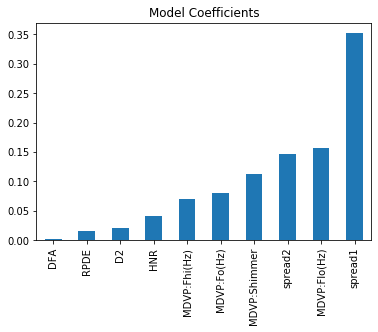

In [30]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
predictors = ["MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Shimmer","HNR","RPDE","DFA","spread2","D2","spread1"]
target ="Status"
modelfit(RF, Rtrain, Rtest, predictors, target, 'LR.csv')
coef1 = pd.Series(RF.feature_importances_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [29]:
#Calculate the accuracy
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

94.87179487179486


In [23]:
A = np.random.randn(4,3)
B = np.sum(A, axis = 1, keepdims = True)

In [24]:
B.shape

(4, 1)